In [0]:
# 1. Do homes with air conditioning have a higher sales price than homes without air conditioning?

In [2]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


homeprices = pd.read_csv("homeprices.applied.econ.csv")


homeprices.info()

homeprices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [3]:
# Split up our dataset

ac_yes = homeprices[homeprices['airco'] == 'yes']
ac_yes.info()

ac_no = homeprices[homeprices['airco'] == 'no']
ac_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
price       173 non-null float64
lotsize     173 non-null int64
bedrooms    173 non-null int64
bathrms     173 non-null int64
stories     173 non-null int64
driveway    173 non-null object
recroom     173 non-null object
fullbase    173 non-null object
gashw       173 non-null object
airco       173 non-null object
garagepl    173 non-null int64
prefarea    173 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
price       373 non-null float64
lotsize     373 non-null int64
bedrooms    373 non-null int64
bathrms     373 non-null int64
stories     373 non-null int64
driveway    373 non-null object
recroom     373 non-null object
fullbase    373 non-null object
gashw       373 non-null object
airco       373 non-null object
garagepl    373 non-null int

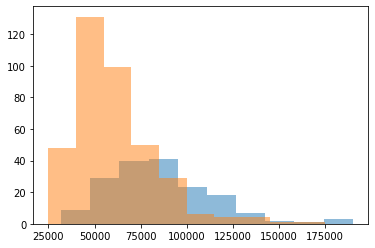

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


In [8]:
# Plot our variables

plt.hist(ac_yes['price'], alpha = .5)
plt.hist(ac_no['price'], alpha = .5)
plt.show()

print(stats.describe(ac_yes['price']))
print(stats.describe(ac_no['price']))

In [0]:
# Answer: based on the stats and histogram, it looks like the average sales price of houses with No AC is higher than houses with AC

In [0]:
# 2. Do homes with a full basement have a higher sales price than homes without a full basement?

In [9]:
# Split up our dataset

fullbase_yes = homeprices[homeprices['fullbase'] == 'yes']
fullbase_yes.info()

fullbase_no = homeprices[homeprices['fullbase'] == 'no']
fullbase_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
price       191 non-null float64
lotsize     191 non-null int64
bedrooms    191 non-null int64
bathrms     191 non-null int64
stories     191 non-null int64
driveway    191 non-null object
recroom     191 non-null object
fullbase    191 non-null object
gashw       191 non-null object
airco       191 non-null object
garagepl    191 non-null int64
prefarea    191 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
price       355 non-null float64
lotsize     355 non-null int64
bedrooms    355 non-null int64
bathrms     355 non-null int64
stories     355 non-null int64
driveway    355 non-null object
recroom     355 non-null object
fullbase    355 non-null object
gashw       355 non-null object
airco       355 non-null object
garagepl    355 non-null int

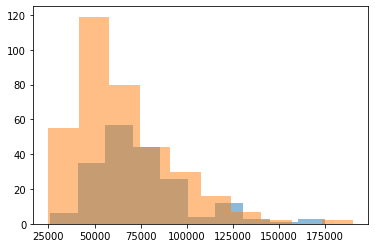

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [11]:
# Plot our variables

plt.hist(fullbase_yes['price'], alpha = .5)
plt.hist(fullbase_no['price'], alpha = .5)
plt.show()

print(stats.describe(fullbase_yes['price']))
print(stats.describe(fullbase_no['price']))

In [12]:
stats.ttest_ind(fullbase_yes['price'], fullbase_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [13]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(fullbase_yes['price'], fullbase_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

[[Text(0, 0, 'fullbase_yes'), Text(0, 0, 'fullbase_no')]]

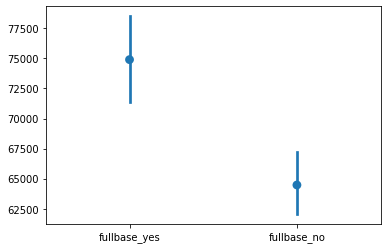

In [14]:
import seaborn as sns

g = sns.pointplot(data=[fullbase_yes['price'], fullbase_no['price']], join=False)
                        
g.set(xticklabels = ['fullbase_yes', 'fullbase_no'])

In [0]:
# Answer: based on the statistics and histogram, we can find out that homes with fullbase have higher average sales than homes with no fullbase